In [29]:
from transformers import AutoTokenizer, BertForQuestionAnswering
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [30]:
tokenizer = AutoTokenizer.from_pretrained("deepset/bert-base-cased-squad2")
model = BertForQuestionAnswering.from_pretrained("deepset/bert-base-cased-squad2")

question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors='pt')

with torch.no_grad():
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)

In [31]:
inputs

{'input_ids': tensor([[  101,  2627,  1108,  3104,  1124, 15703,   136,   102,  3104,  1124,
         15703,  1108,   170,  3505, 16797,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [32]:
inputs.input_ids.shape

torch.Size([1, 16])

In [33]:
ticks = []
for i in range(16):
    print(inputs.input_ids[0][i], ':', tokenizer.decode(inputs.input_ids[0][i]))
    ticks.append(tokenizer.decode(inputs.input_ids[0][i]))

tensor(101) : [CLS]
tensor(2627) : Who
tensor(1108) : was
tensor(3104) : Jim
tensor(1124) : He
tensor(15703) : ##nson
tensor(136) : ?
tensor(102) : [SEP]
tensor(3104) : Jim
tensor(1124) : He
tensor(15703) : ##nson
tensor(1108) : was
tensor(170) : a
tensor(3505) : nice
tensor(16797) : puppet
tensor(102) : [SEP]


In [34]:
ticks

['[CLS]',
 'Who',
 'was',
 'Jim',
 'He',
 '##nson',
 '?',
 '[SEP]',
 'Jim',
 'He',
 '##nson',
 'was',
 'a',
 'nice',
 'puppet',
 '[SEP]']

In [35]:
outputs.keys()

odict_keys(['start_logits', 'end_logits', 'hidden_states', 'attentions'])

In [36]:
len(outputs.hidden_states)

13

In [37]:
for i in range(13):
    print(outputs.hidden_states[i].shape)

torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])
torch.Size([1, 16, 768])


In [38]:
attentions = torch.tensor(np.array(outputs.attentions))

In [39]:
attentions.shape

torch.Size([12, 1, 12, 16, 16])

In [40]:
attentions[0].shape

torch.Size([1, 12, 16, 16])

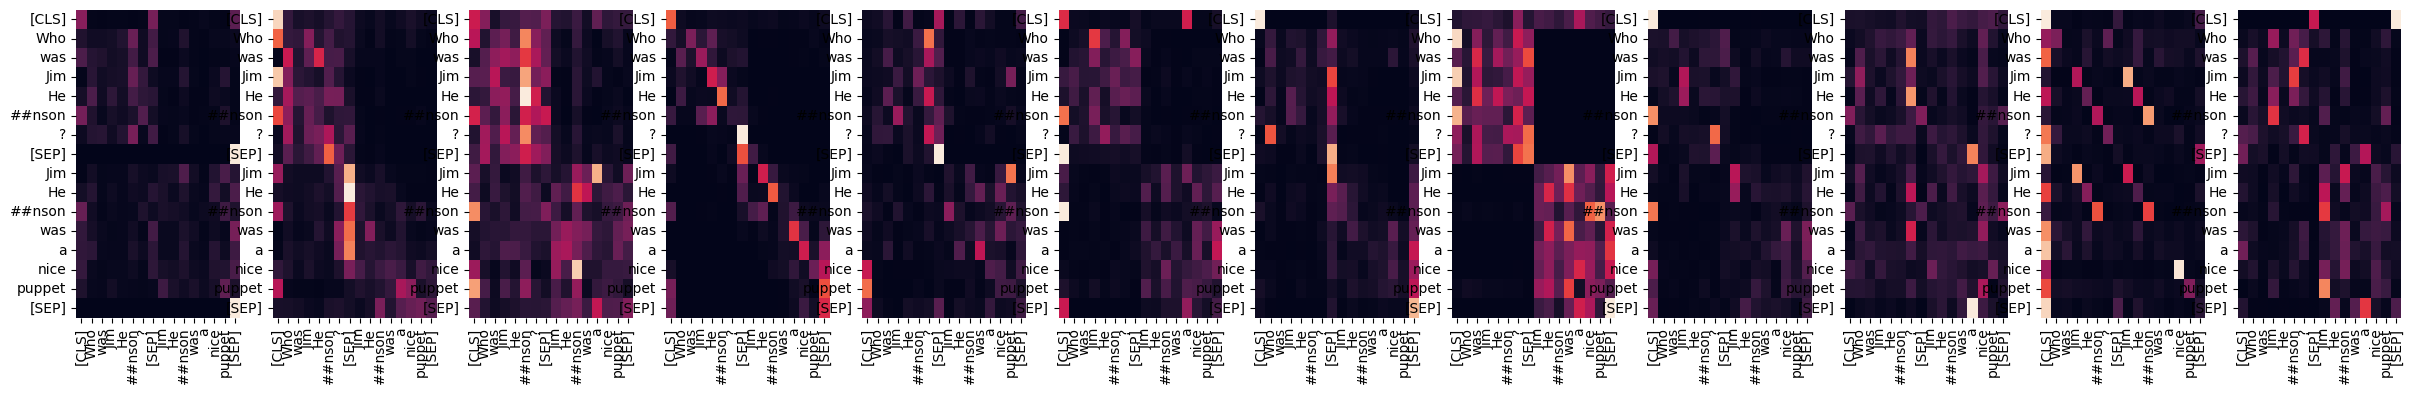

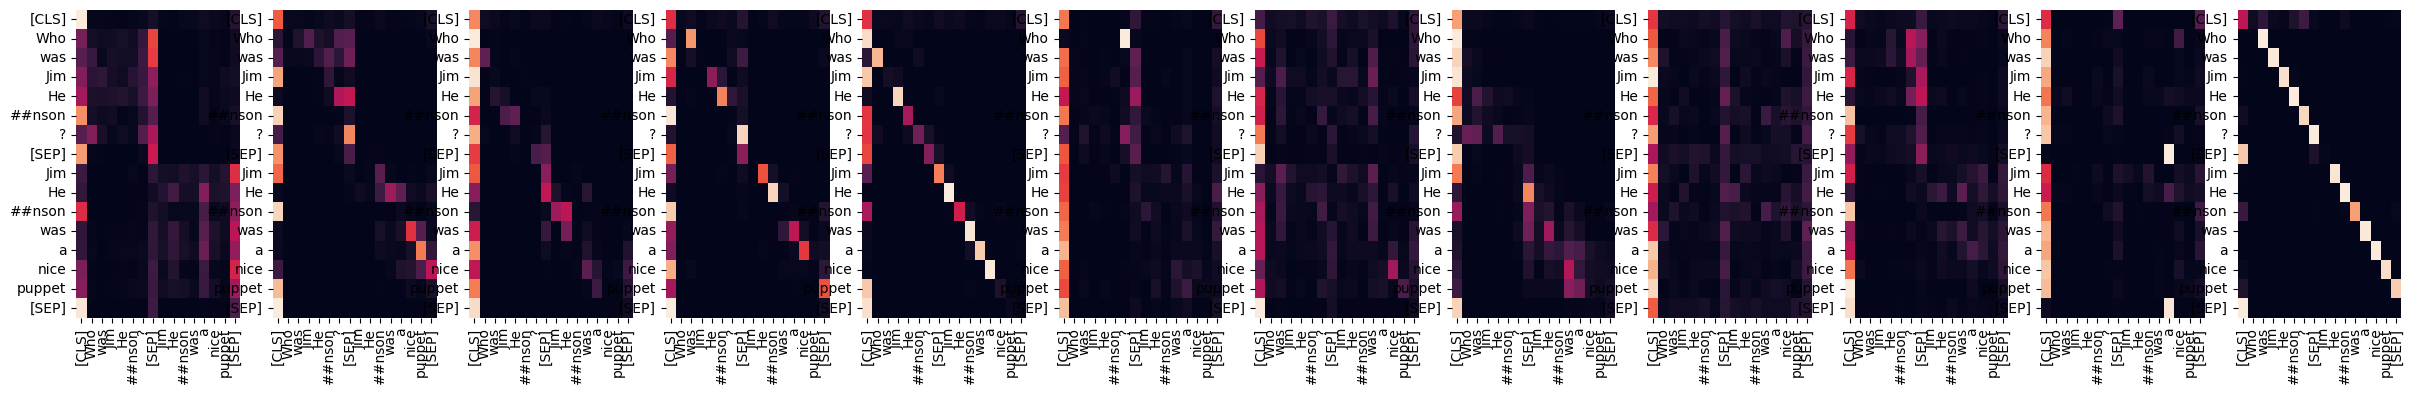

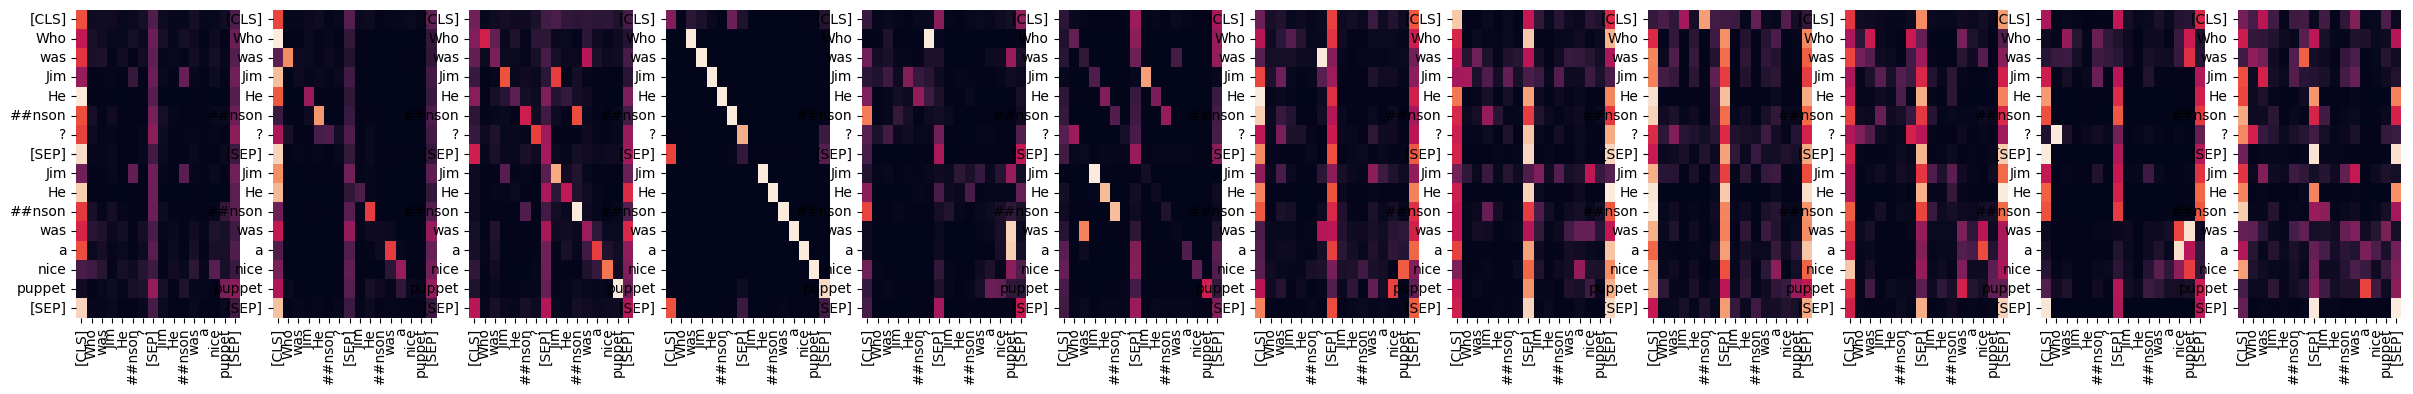

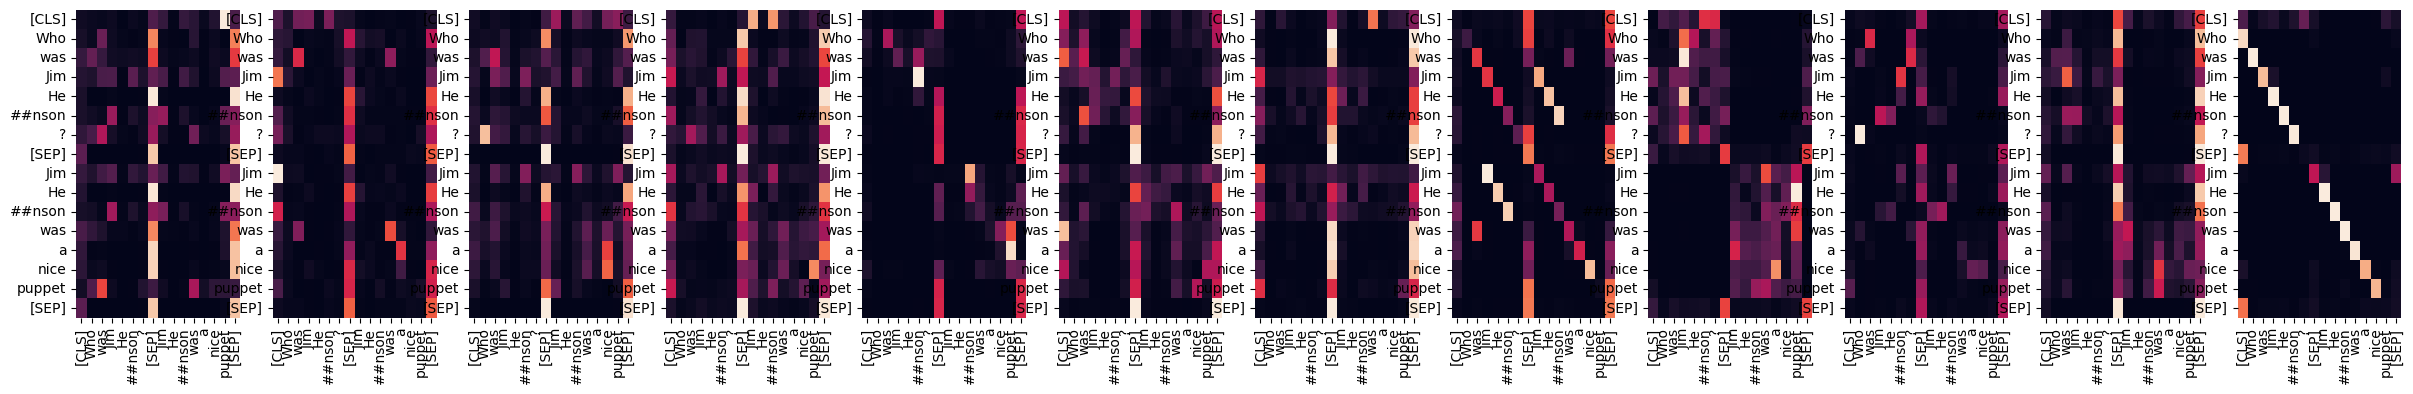

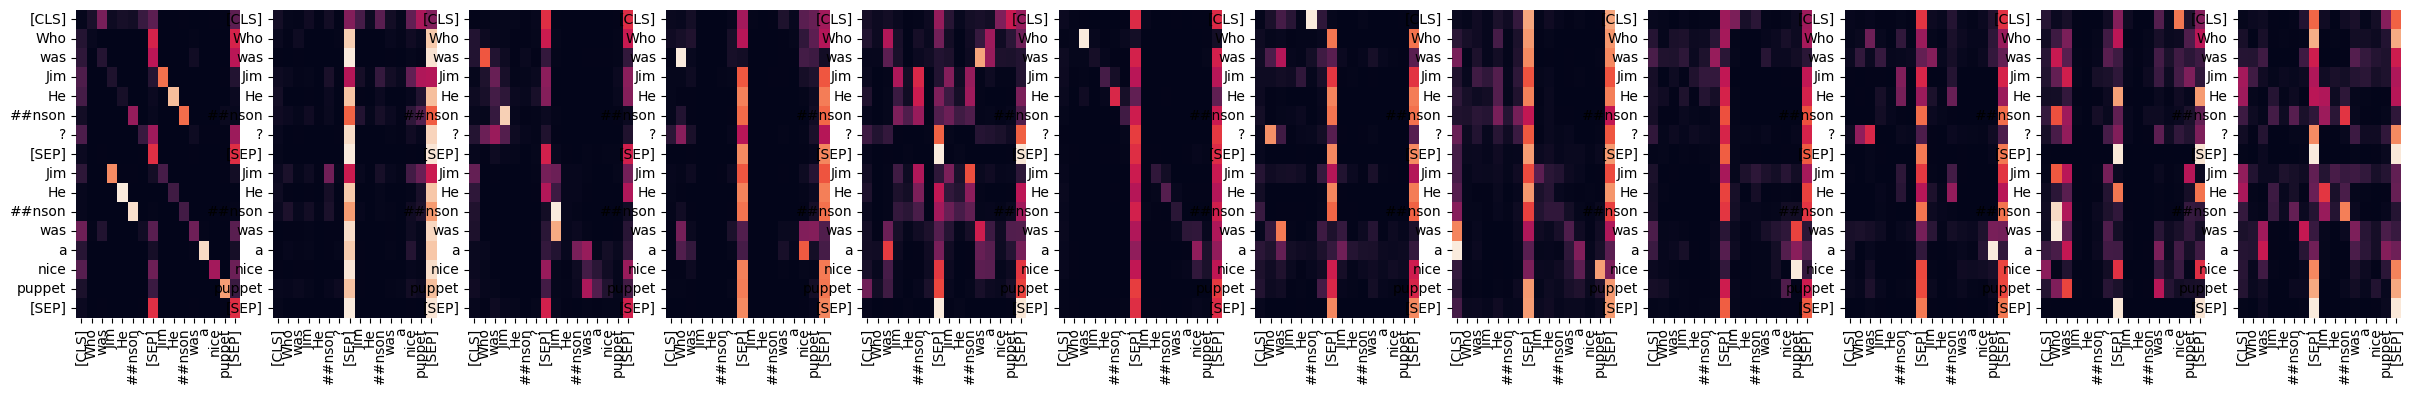

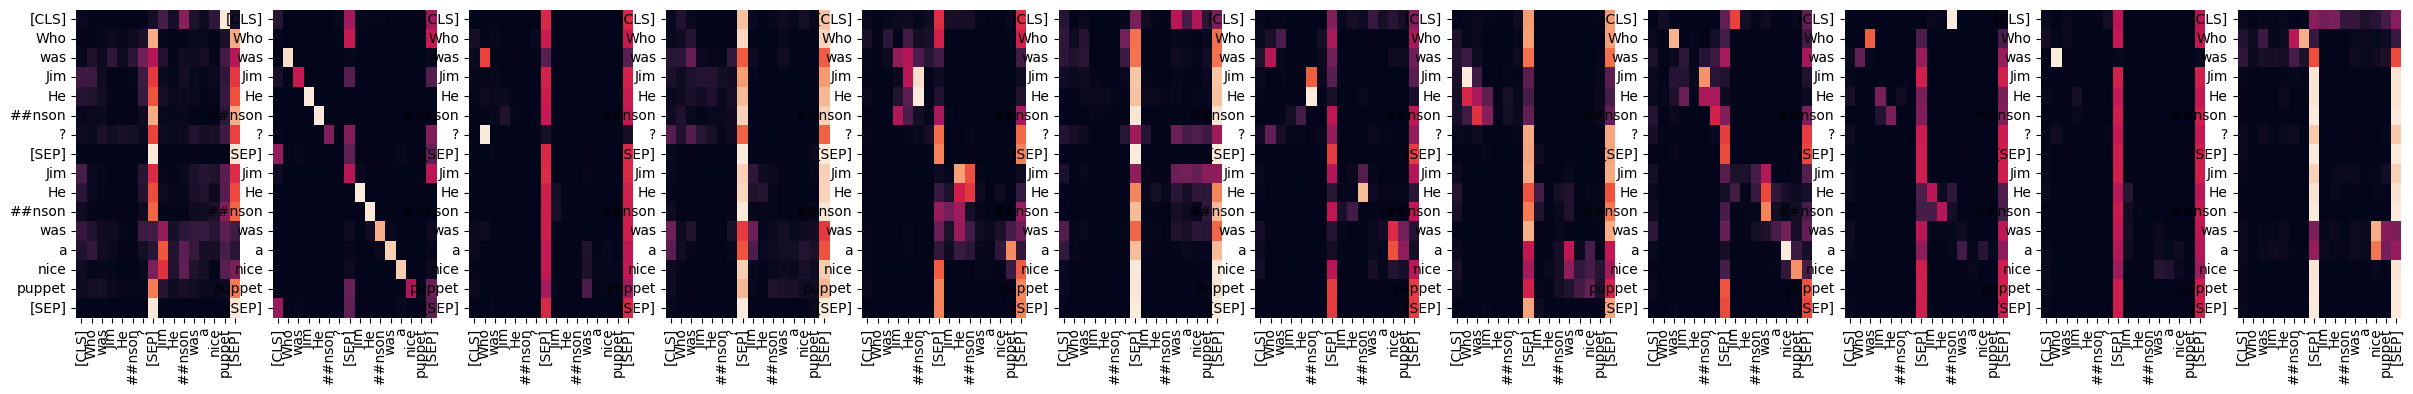

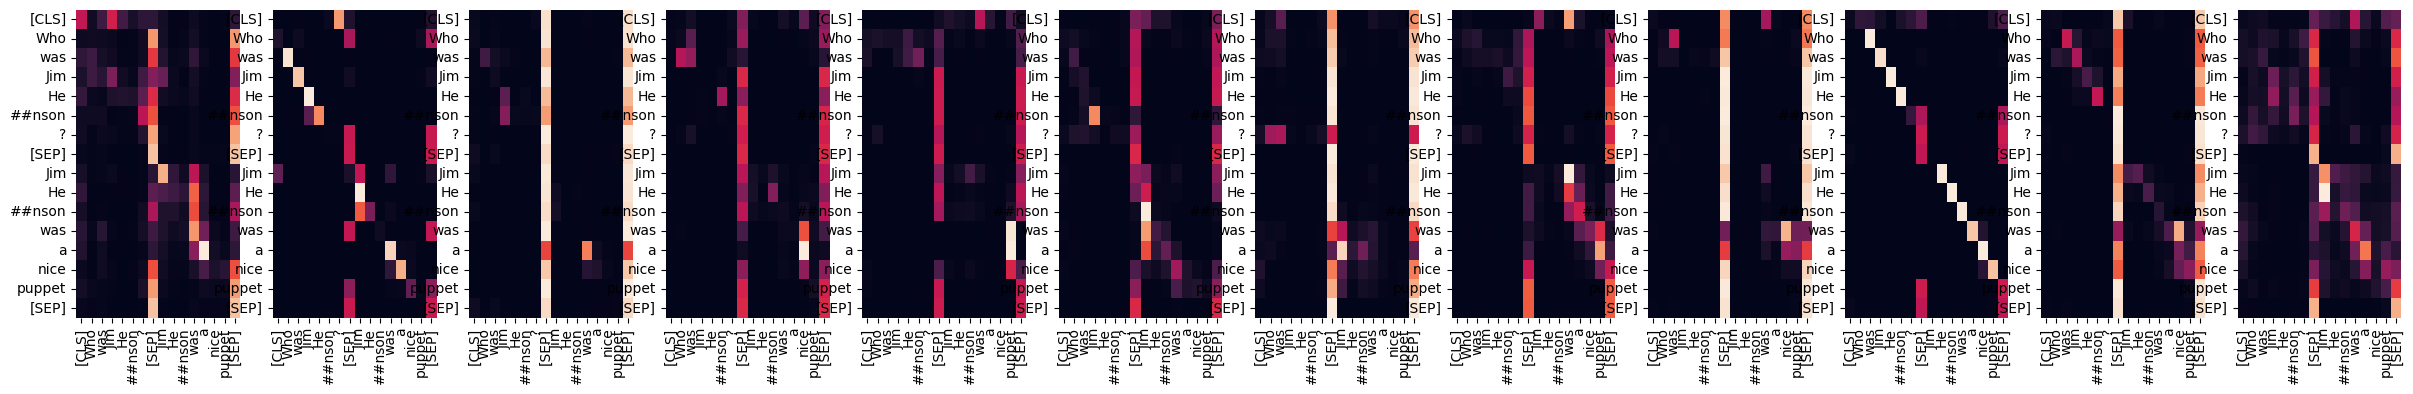

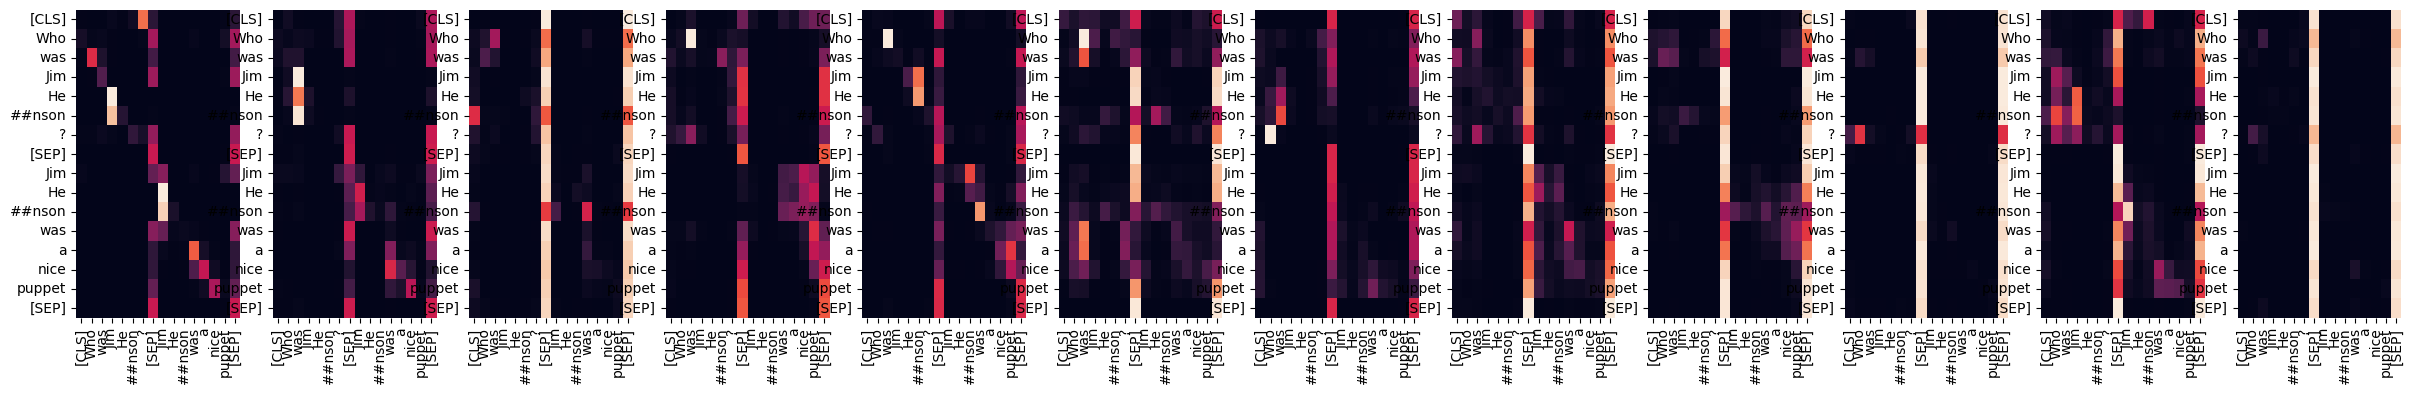

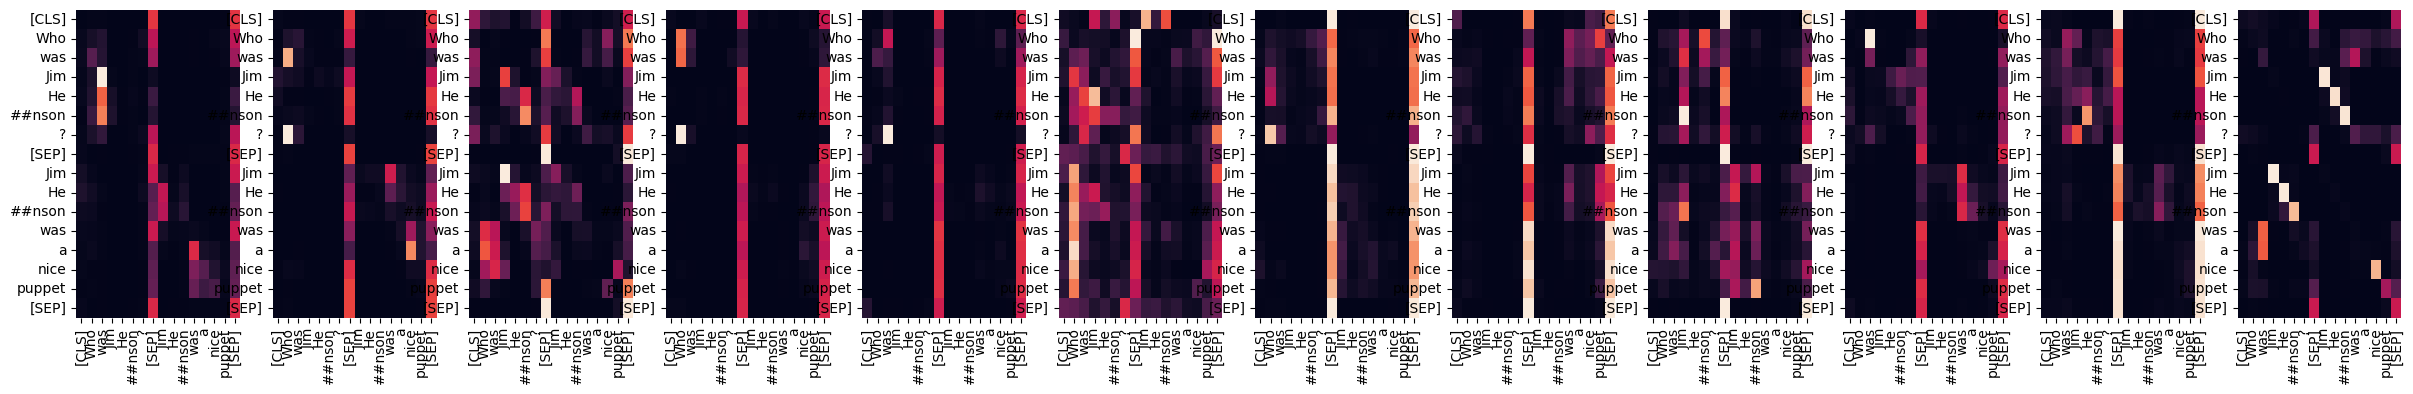

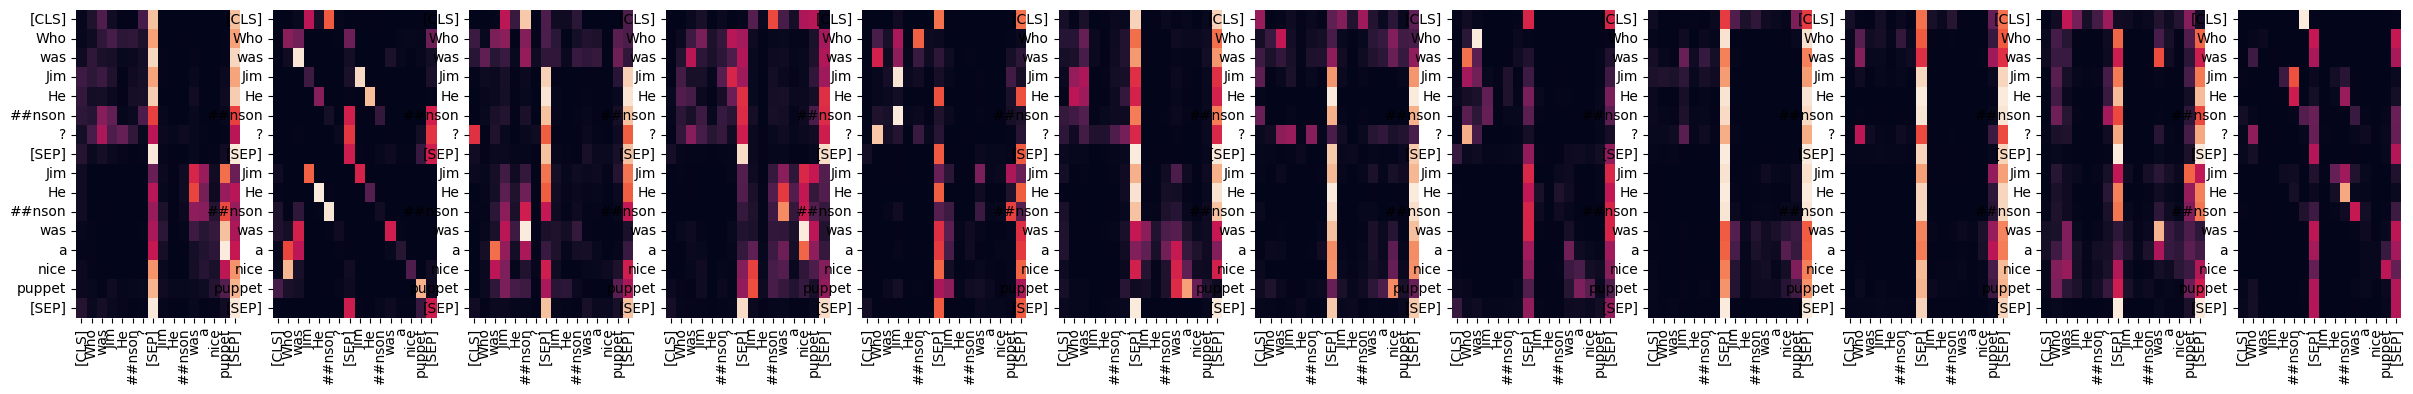

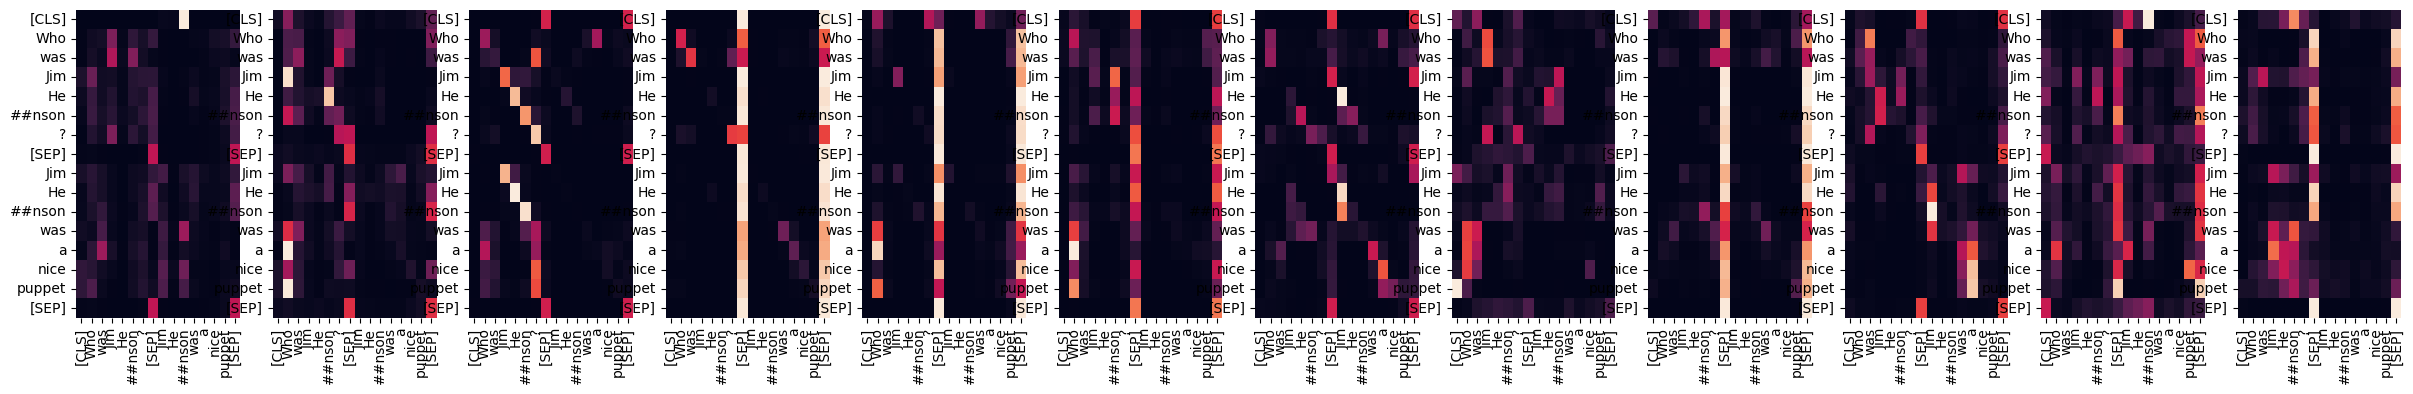

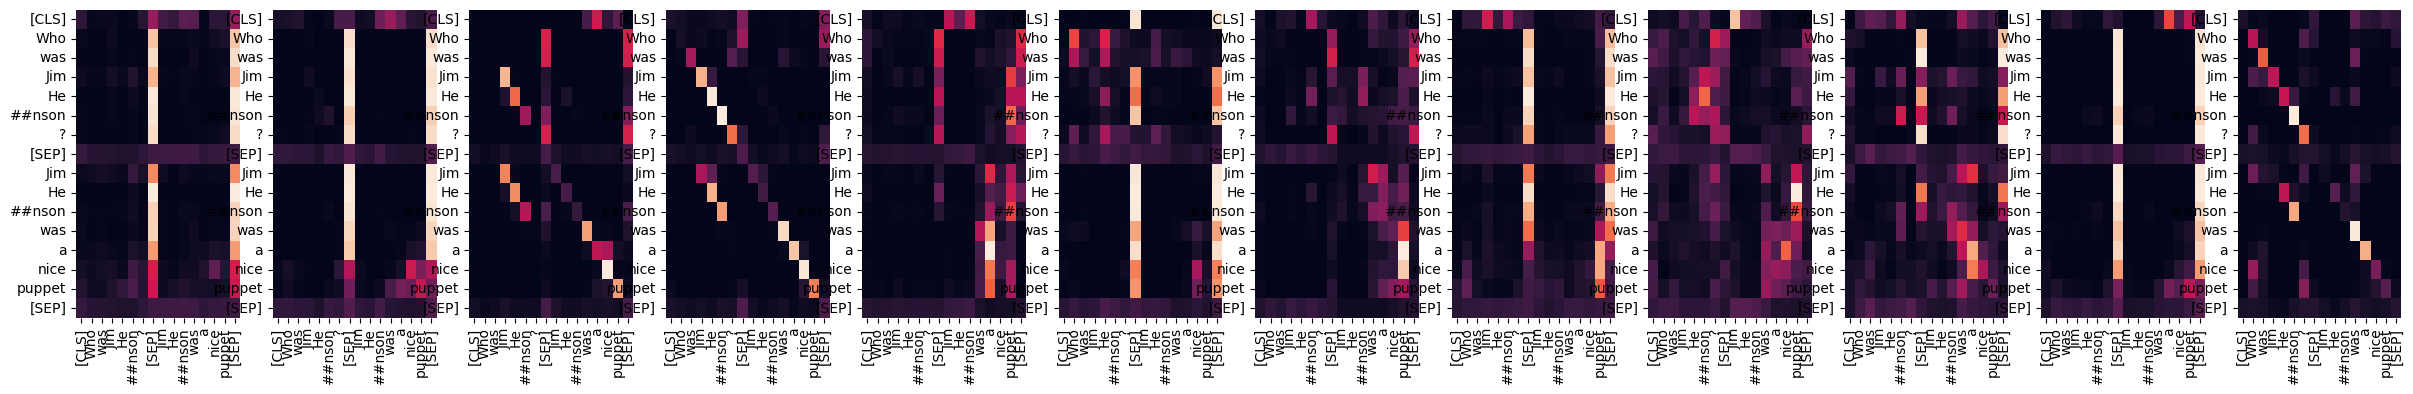

In [43]:
for i in range(12):
    plt.figure(figsize=(30,4))
    for j in range(12):    
        plt.subplot(1, 12, j+1)
        sns.heatmap(data=attentions[i][0, j].numpy(), xticklabels=ticks, yticklabels=ticks, cbar=False)
    plt.show()
        

In [17]:
# Load model and retrieve attention weights

from bertviz import head_view, model_view
# from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer, BertForQuestionAnswering

model_version = 'deepset/bert-base-cased-squad2'
model = BertForQuestionAnswering.from_pretrained(model_version, output_attentions=True, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(model_version)
sentence_a = "Who was Jim Henson?"
sentence_b = "Jim Henson was a nice puppet"
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1)
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list) 

In [28]:
import torch
import numpy as np

In [37]:
attention_tensors = []

for tensor in model(input_ids, token_type_ids=token_type_ids).attentions:
    attention_tensors.append(tensor.detach().numpy())

attentions_temp = torch.tensor(np.array(attention_tensors))

In [38]:
attentions_temp.shape

torch.Size([12, 1, 12, 16, 16])

In [16]:
head_view(attention, tokens, sentence_b_start)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 head_view(attention, tokens, sentence_b_start)                                               │
│   2                                                                                              │
│                                                                                                  │
│ c:\ProgramData\Anaconda3\lib\site-packages\bertviz\head_view.py:63 in head_view                  │
│                                                                                                  │
│    60 │   │   │   │   │   │   │    " argument is only for self-attention models.")               │
│    61 │   │   if include_layers is None:                                                         │
│    62 │   │   │   include_layers = list(range(num_layers(attention)))                            │
│ ❱  63 │   │   attention = format_attention(attention, include_layers)                            │
│    64 │   │   if sentence_b_start is None:                                                       │
│    65 │   │   │   attn_data.append(                                                              │
│    66 │   │   │   │   {                                                                          │
│                                                                                                  │
│ c:\ProgramData\Anaconda3\lib\site-packages\bertviz\util.py:11 in format_attention                │
│                                                                                                  │
│    8 │   for layer_attention in attention:                                                       │
│    9 │   │   # 1 x num_heads x seq_len x seq_len                                                 │
│   10 │   │   if len(layer_attention.shape) != 4:                                                 │
│ ❱ 11 │   │   │   raise ValueError("The attention tensor does not have the correct number of d    │
│   12 │   │   │   │   │   │   │    "output_attentions=True when initializing your model.")        │
│   13 │   │   layer_attention = layer_attention.squeeze(0)                                        │
│   14 │   │   if heads:                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: The attention tensor does not have the correct number of dimensions. Make sure you set 
output_attentions=True when initializing your model.

In [6]:
model_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

In [8]:
# from bertviz.transformers_neuron_view import BertModel, BertTokenizer
from bertviz.neuron_view import show

model_type = 'bert'
# model_version = 'bert-base-uncased'
# model = BertModel.from_pretrained(model_version, output_attentions=True)
# tokenizer = BertTokenizer.from_pretrained(model_version, do_lower_case=True)

model_version = 'deepset/bert-base-cased-squad2'
model = BertForQuestionAnswering.from_pretrained(model_version, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_version)

show(model, model_type, tokenizer, sentence_a, sentence_b, layer=4, head=3)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:13                                                                                   │
│                                                                                                  │
│   10 model = BertForQuestionAnswering.from_pretrained(model_version, output_attentions=True)     │
│   11 tokenizer = AutoTokenizer.from_pretrained(model_version)                                    │
│   12                                                                                             │
│ ❱ 13 show(model, model_type, tokenizer, sentence_a, sentence_b, layer=4, head=3)                 │
│   14                                                                                             │
│                                                                                                  │
│ c:\ProgramData\Anaconda3\lib\site-packages\bertviz\neuron_view.py:68 in show                     │
│                                                                                                  │
│    65 │                                                                                          │
│    66 │   __location__ = os.path.realpath(                                                       │
│    67 │   │   os.path.join(os.getcwd(), os.path.dirname(__file__)))                              │
│ ❱  68 │   attn_data = get_attention(model, model_type, tokenizer, sentence_a, sentence_b, incl   │
│    69 │   if model_type == 'gpt2':                                                               │
│    70 │   │   bidirectional = False                                                              │
│    71 │   else:                                                                                  │
│                                                                                                  │
│ c:\ProgramData\Anaconda3\lib\site-packages\bertviz\neuron_view.py:186 in get_attention           │
│                                                                                                  │
│   183 │   │   slice_b = slice(len(tokens_a), len(tokens_a) + len(tokens_b))  # Position corres   │
│   184 │   for layer, attn_data in enumerate(attn_data_list):                                     │
│   185 │   │   # Process attention                                                                │
│ ❱ 186 │   │   attn = attn_data['attn'][0]  # assume batch_size=1; shape = [num_heads, source_s   │
│   187 │   │   attn_dict['all'].append(attn.tolist())                                             │
│   188 │   │   if is_sentence_pair:                                                               │
│   189 │   │   │   attn_dict['aa'].append(                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: new(): invalid data type 'str'